In [21]:
!pip install embedding-as-service

In [22]:
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# sentence feature extracter
from embedding_as_service.text.encode import Encoder
# scikit model used
from sklearn import linear_model
# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
url_1 = 'https://raw.githubusercontent.com/TeamEpicProjects/Customer_Support_Ticket_Classification/Day_04/ticket_train.csv'
train = pd.read_csv(url_1)
url_2 = 'https://raw.githubusercontent.com/TeamEpicProjects/Customer_Support_Ticket_Classification/Day_04/ticket_valid.csv'
valid = pd.read_csv(url_2)

In [24]:
model_encode = Encoder(embedding='word2vec', model='google_news_300')

In [25]:
# encoding training dataset
train_encode = model_encode.encode(texts = list(train['info'].values), pooling='reduce_mean')
train_encode.shape

(38839, 300)

In [26]:
# encoding validation dataset
valid_encode = model_encode.encode(texts = list(valid['info'].values), pooling='reduce_mean')
valid_encode.shape

(4855, 300)

In [167]:
# creating Logistic Regression instance and fitting the model with training word2vec encoded vector and target ticket_type column
LRG = linear_model.LogisticRegression(random_state = 35,solver = 'liblinear',multi_class = 'auto',class_weight='balanced').fit(train_encode, train['ticket_type'])
# 

In [168]:
y_valid_preds = LRG.predict(valid_encode)

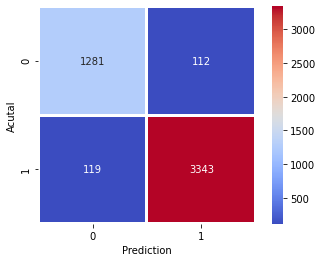

In [169]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=2, linecolor='w', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [170]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 95.24%.


In [80]:
print(classification_report(valid['ticket_type'], y_valid_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1393
           1       0.97      0.97      0.97      3462

    accuracy                           0.95      4855
   macro avg       0.94      0.94      0.94      4855
weighted avg       0.95      0.95      0.95      4855



In [156]:
grid_values_cv = {'penalty': ['l2'],'C': [0.1, 1, 10, 100, 1000]}
# creating Logistic Regression instance and fitting the model with training word2vec encoded vector and target ticket_type column
grid_LRG_cv = GridSearchCV(linear_model.LogisticRegression(random_state = 35,class_weight='balanced'), param_grid = grid_values_cv,scoring = 'recall',cv=3).fit(train_encode,train['ticket_type'])
#Predict values based on new parameters
y_valid_preds_grid_cv = grid_LRG_cv.predict(valid_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


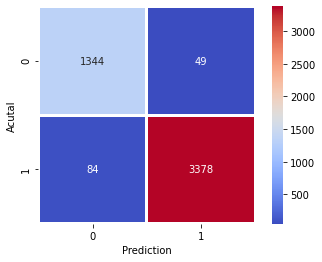

In [157]:
con_mat_grid_cv = confusion_matrix(valid['ticket_type'], y_valid_preds_grid_cv)
sns.heatmap(con_mat_grid_cv, annot=True, fmt='.0f', square=True,cmap= 'coolwarm',linewidth=2, linecolor='w')
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [158]:
# print how our model looks after hyper-parameter tuning
print(grid_LRG_cv.best_estimator_)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=35, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [137]:
...
# summarize result
print('Best Score: %s' % grid_LRG_cv.best_score_)
print('Best Hyperparameters: %s' % grid_LRG_cv.best_params_)

Best Score: 0.9362387549982566
Best Hyperparameters: {'C': 50, 'penalty': 'l2'}


In [159]:
acc_cv = accuracy_score(valid['ticket_type'], y_valid_preds_grid_cv)
print(f'Model accuracy score = {acc_cv*100:0.2f}%.')

Model accuracy score = 97.26%.


In [87]:
url_3 = 'https://raw.githubusercontent.com/TeamEpicProjects/Customer_Support_Ticket_Classification/Day_04/ticket_test.csv'
test = pd.read_csv(url_3)

In [106]:
# encoding testing dataset
test_encode = model_encode.encode(texts = list(test['info'].values), pooling='reduce_mean')
test_encode.shape

(4855, 300)

In [160]:
grid_LRG_cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [174]:
LRG_final = linear_model.LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=35, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False).fit(train_encode,train['ticket_type'])
y_test_preds = LRG_final.predict(test_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


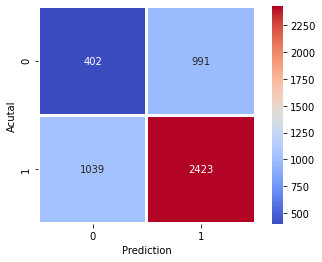

In [175]:
con_mat_final = confusion_matrix(valid['ticket_type'], y_test_preds)
sns.heatmap(con_mat_final, annot=True, fmt='.0f', square=True,cmap= 'coolwarm',linewidth=2, linecolor='w')
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [176]:
acc_final = accuracy_score(valid['ticket_type'], y_test_preds)
print(f'Model accuracy score = {acc_final*100:0.2f}%.')

Model accuracy score = 58.19%.


In [166]:
print(classification_report(valid['ticket_type'], y_test_preds))

              precision    recall  f1-score   support

           0       0.28      0.29      0.28      1393
           1       0.71      0.70      0.70      3462

    accuracy                           0.58      4855
   macro avg       0.49      0.49      0.49      4855
weighted avg       0.59      0.58      0.58      4855

